## Name: Agrawal Nidhi
## Student id: 21-717-673

<br>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import scipy.special

### Method: To compute
- The Poisson distribution with mean value ⟨𝑘⟩ = 𝜆 : 𝑃(𝑘, 𝜆) =( 𝜆ˆ𝑘/𝑘! )( exp(−𝜆) )
- The exponential distribution with mean value ⟨𝑘⟩ = 𝜆 : 𝑃(𝑘, 𝜆) = (𝜆ˆ−1)exp(−𝑘/𝜆)

In [2]:
def Distributions(avgDeg, degSpacing):
    
    poissonList = []
    expList = []
    kList = []
    
    for k in sorted(degSpacing):
        
        poisson = ((avgDeg**k)/scipy.special.factorial(k))*scipy.math.exp(-avgDeg) # Poisson Distribution
        poissonList.append(poisson)
        
        exp = (avgDeg**(-1))*scipy.math.exp(-k/avgDeg)                             # Exponential Distribution
        expList.append(exp)
        
        kList.append(k)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(10**(-8), 10) # Fix the y limits to fit all the points
    plt.plot(kList, poissonList, color = 'lime', label = 'Poisson')
    plt.plot(kList, expList, color = 'violet', label = 'Exponential')
    
    

### Method:
- Plot Power-law probability distribution

In [3]:
def plotPowerLaw(degreeArray, degSpacing, avgDeg, filename): 
    
    fit = powerlaw.Fit(degreeArray)    # fit  P(k)
    alpha = fit.power_law.alpha        # power-law exponent
    sigma = fit.power_law.sigma        # standard error
    

    print('\n\n')
    print('Power-law exponent for '+ filename + 'network: alpha = ', round(alpha,3))
    print('Corresponding error '+ filename + 'network: sigma = ', round(sigma,3))
    print('\n\n')
    
    plt.figure(figsize=(9,6))

    Distributions(avgDeg, degSpacing) # call method to plot poisson and exponential distributions

    fit.power_law.plot_pdf(color='r', label = 'pdf - fitted')                          # Plot P(k) - fitted
    powerlaw.plot_pdf(degreeArray, color='b', marker='o', label = 'pdf - not fitted')  # Plot P(k) - not fitted
    
    #plt.plot(degreeArray, degreeArray**(-alpha), color = 'darkgreen', label = '(kˆ(-alpha) vs k')
    plt.plot(degSpacing, degSpacing**(-alpha), color = 'darkgreen', label = '(kˆ(-alpha) vs k')

    plt.xlabel('Degree (k)', fontsize = 16)
    plt.ylabel('P(k): Probability of degree k', fontsize = 16)
    plt.title(filename, fontsize = 16)
    plt.legend(fontsize = 12)
    plt.show()
    
    print('\n\n')
    

Calculating best minimal value for power law fit
xmin progress: 99%


Power-law exponent for Sex escorts networknetwork: alpha =  2.954
Corresponding error Sex escorts networknetwork: sigma =  0.079





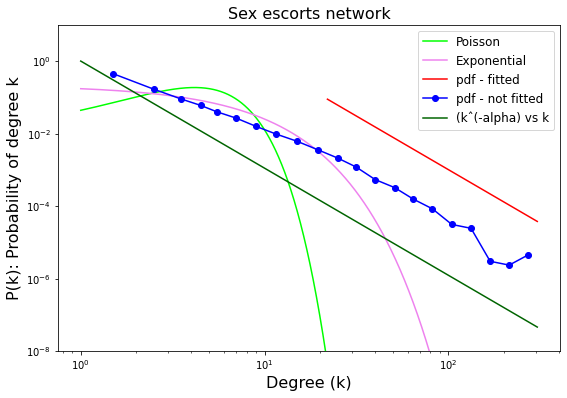




Calculating best minimal value for power law fit
xmin progress: 99%


Power-law exponent for Amazonnetwork: alpha =  4.066
Corresponding error Amazonnetwork: sigma =  0.097





<ipython-input-2-e33abda46961>:9: RuntimeWarning: overflow encountered in double_scalars
  poisson = ((avgDeg**k)/scipy.special.factorial(k))*scipy.math.exp(-avgDeg) # Poisson Distribution
<ipython-input-2-e33abda46961>:9: RuntimeWarning: invalid value encountered in double_scalars
  poisson = ((avgDeg**k)/scipy.special.factorial(k))*scipy.math.exp(-avgDeg) # Poisson Distribution


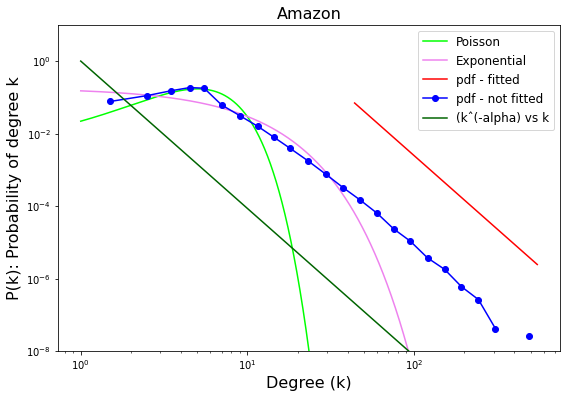




Calculating best minimal value for power law fit
xmin progress: 99%


Power-law exponent for Internetnetwork: alpha =  2.112
Corresponding error Internetnetwork: sigma =  0.037





<ipython-input-2-e33abda46961>:9: RuntimeWarning: overflow encountered in double_scalars
  poisson = ((avgDeg**k)/scipy.special.factorial(k))*scipy.math.exp(-avgDeg) # Poisson Distribution
<ipython-input-2-e33abda46961>:9: RuntimeWarning: invalid value encountered in double_scalars
  poisson = ((avgDeg**k)/scipy.special.factorial(k))*scipy.math.exp(-avgDeg) # Poisson Distribution


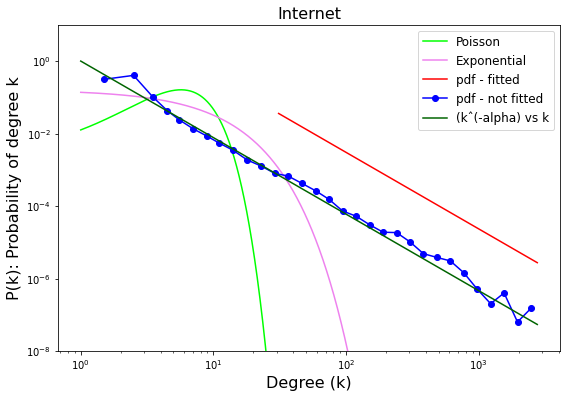

In [4]:

graph = []
title = []
edges_name = []

graph.append(nx.read_gml('Data/graph_escort.gml'))    # list of networks
title.append('Sex escorts network')                   # List of network names
edges_name.append('Sexual encounter (degree k)')      # List of names of edges of the network

graph.append(nx.read_gml('Data/graph_amazon.gml'))
title.append('Amazon')
edges_name.append('Co-purchased products (degree k)')

graph.append(nx.read_gml('Data/graph_internet.gml'))
title.append('Internet')
edges_name.append('Connections between\nautonomous systems (degree k)')

'''
graph.append(nx.read_gml('Data/graph_actors.gml'))
title.append('Actors')
edges_name.append('Appearance in same movie (degree k)')
'''


for i in range(0,len(title)):
    
    # an array of degrees of all nodes in the graph
    degreeArray = np.asarray([d for d in dict(graph[i].degree()).values()])

    # average degree of the network
    avgDeg = np.mean(degreeArray)

    # evenly spaced degrees
    degSpacing = np.linspace(min(degreeArray),max(degreeArray),len(degreeArray))


    # plot power-law probability distribution of the network
    plotPowerLaw(degreeArray, degSpacing, avgDeg, title[i])



### Which distribution is more likely to describe the data?

- Power law distribution is more likely to describe the data. Very high degrees are not fitted by Poisson and Exponential distributions. 
- In a poisson distribution, degree distribution dwells near average degree of the network and therefore is doesn't describe the realistic network.

### What does it mean in practice for the Internet?

- Internet is an approximately scale free network (Barabasi-Albert model) and follows a power law distribution. Nodes with higher degrees are very important in the network and are not considered by the poisson distribution. 
- Number of nodes (34761) is very high with respect to the average degree of the network. Therefore, it is expected that the network will follow a poisson distribution but in reality it follows a power law distribution as the power law fits all degrees.


### Error for graph_actors network:
- NetworkXError: expected an int, float, string or '[', found EOF at (12593257, 1) error for graph_actors

Build networks with the Barabási-Albert model.Connect𝑚 = 3for each new node and grow until𝑁 = 50, 100, 500, 1000, 5000, then compute somenetwork properties. Compare them with randomisedversions of the networks.

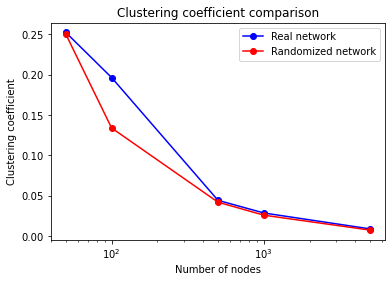

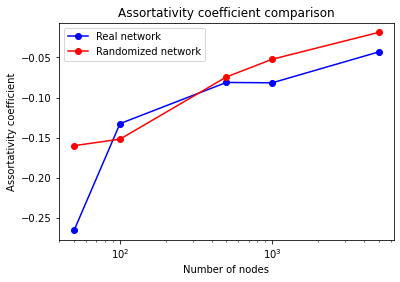

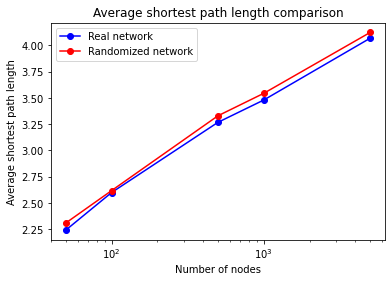

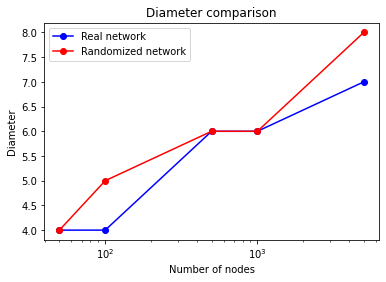

In [5]:

nodes_counter = [50, 100, 500, 1000, 5000]

clust_coeff_list = []
assort_list = []
path_list = []
diameter_list = []

clust_coeff_rand_list = []
assort_rand_list = []
path_rand_list = []
diameter_rand_list = []


for c in nodes_counter:
    
    graph = nx.barabasi_albert_graph(c,3)      # generate barabasi albert graph 
    
    clust_coeff = nx.average_clustering(graph)           # average clustering coefficient
    assort = nx.degree_assortativity_coefficient(graph)  # assortativity coefficient
    path = nx.average_shortest_path_length(graph)        # average shortest path length
    diameter = nx.diameter(graph)                        # diameter of the graph
    
    clust_coeff_list.append(clust_coeff)
    assort_list.append(assort)
    path_list.append(path)
    diameter_list.append(diameter)

    
    
    # randomize graph
    grnd_graph = nx.algorithms.smallworld.random_reference(graph, niter = 10, connectivity=False)
    
    clust_coeff_random = nx.average_clustering(grnd_graph)           # average clustering coefficient
    assort_random = nx.degree_assortativity_coefficient(grnd_graph)  # assortativity coefficient
    path_random = nx.average_shortest_path_length(grnd_graph)        # average shortest path length
    diameter_random = nx.diameter(grnd_graph)                        # diameter of the graph
    
    clust_coeff_rand_list.append(clust_coeff_random)
    assort_rand_list.append(assort_random)
    path_rand_list.append(path_random)
    diameter_rand_list.append(diameter_random)
    
    
    
real_list = [clust_coeff_list, assort_list, path_list, diameter_list]
random_list = [clust_coeff_rand_list, assort_rand_list, path_rand_list, diameter_rand_list]

label_list = ['Clustering coefficient', 'Assortativity coefficient', 'Average shortest path length', 'Diameter']

for i in range(0, len(real_list)):
    
    # plot graphs
    plt.plot(nodes_counter,real_list[i], '-ok', label = 'Real network', color = 'blue')
    plt.plot(nodes_counter,random_list[i], '-ok', label = 'Randomized network', color = 'red')
    plt.title(label_list[i] + ' comparison')
    plt.xlabel('Number of nodes')
    plt.ylabel(label_list[i])
    plt.xscale('log')
    plt.legend()
    plt.show()




### Which of these measures is relatively unchanged by randomisation? Why?

- Randomization of scale free network doesn't change the connectivity of the network. Also, the topology of the network is somewhat maintained. Therefore average path length is relatively unchanged.
